<a href="https://colab.research.google.com/github/datadigger01/datamining/blob/main/kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # to draw graphs
import seaborn as sns
%matplotlib inline

# K-Nearest Neighbor(kNN) 알고리즘

# 1. Forecasting/Regression

In [3]:
df = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/BostonHousing.csv')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0,0


## 1) 종속변수, 독립변수 설정

In [4]:
#타겟/종속변수
label =['MEDV']
#Feature/독립변수/설명변수
features = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [5]:
from sklearn.preprocessing import StandardScaler

std_var = StandardScaler().fit_transform(df[features])
df_std = pd.concat([pd.DataFrame(std_var, columns=features), df[label]], axis=1)
df_std

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,24.0
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,21.6
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,34.7
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,33.4
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,-0.413229,-0.487722,0.115738,-0.272599,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147,22.4
502,-0.415249,-0.487722,0.115738,-0.272599,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850,20.6
503,-0.413447,-0.487722,0.115738,-0.272599,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048,23.9
504,-0.407764,-0.487722,0.115738,-0.272599,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302,22.0


## 2) 학습(Train), 검증(Test) 데이터 분리

In [7]:
from sklearn.model_selection import train_test_split
# Split Data for Logistic Regression
X_train, X_test, y_train, y_test = train_test_split(df_std[features], df_std[label], test_size=0.25, random_state=365)
print("Train",X_train.shape)
print("Test",X_test.shape)

Train (379, 13)
Test (127, 13)


## 3) 모델링

+ kNN 알고리즘 import 및 hyperparamter 설정

In [8]:
from sklearn.neighbors import KNeighborsRegressor

In [17]:
neigh = KNeighborsRegressor(n_neighbors=5)

+ 학습(Training)

In [18]:
kNN_model=neigh.fit(X_train, y_train)

+ 학습된 모델로 예측

In [19]:
predicted_value = kNN_model.predict(X_test)
predicted_value

array([[20.44],
       [23.98],
       [42.48],
       [40.44],
       [33.66],
       [20.74],
       [11.36],
       [10.5 ],
       [21.7 ],
       [28.26],
       [28.02],
       [22.68],
       [17.92],
       [23.54],
       [25.96],
       [10.12],
       [ 9.34],
       [20.2 ],
       [12.78],
       [17.36],
       [34.44],
       [19.14],
       [20.62],
       [22.52],
       [32.44],
       [ 9.  ],
       [12.66],
       [14.04],
       [23.28],
       [24.88],
       [31.66],
       [ 9.38],
       [18.52],
       [39.16],
       [14.54],
       [15.88],
       [22.34],
       [15.88],
       [31.98],
       [19.66],
       [19.48],
       [23.42],
       [13.92],
       [25.54],
       [43.22],
       [15.8 ],
       [13.78],
       [24.82],
       [24.32],
       [12.64],
       [24.76],
       [33.74],
       [41.78],
       [14.46],
       [25.9 ],
       [17.18],
       [14.24],
       [32.44],
       [39.34],
       [18.52],
       [19.84],
       [18.4 ],
       [

+ 예측된 결과와 실제값 비교

In [20]:
y_test_re = y_test.reset_index(drop=True)
result_com=pd.concat([y_test_re, pd.DataFrame(predicted_value, columns=['kNN_pred_MEDV'])], axis=1)
result_com

,MEDV,kNN_pred_MEDV
0,15.3,20.44
1,25.0,23.98
2,41.7,42.48
3,50.0,40.44
4,34.9,33.66
...,...,...
122,13.6,15.50
123,5.0,8.74
124,35.4,27.22
125,37.3,30.66


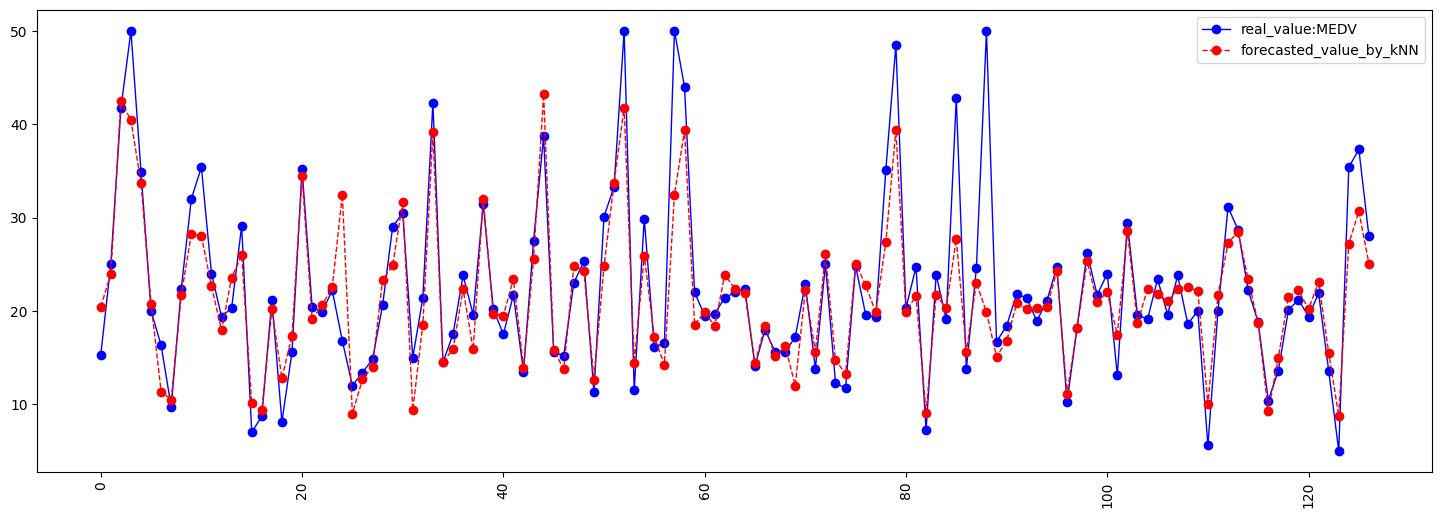

In [21]:
plt.figure(figsize=(18,6))

# 실제값 Plot
plt.plot(result_com['MEDV'], marker='o',markersize=6,color='blue',linewidth=1,label='real_value:MEDV' )
# 예측값 Plot
plt.plot(result_com['kNN_pred_MEDV'], marker='o',markersize=6,color='red', linestyle='dashed', linewidth=1,label='forecasted_value_by_kNN')

plt.legend()
plt.xticks(rotation=90)
plt.show()

## 4) 예측모형의 성능평가
   + MAE(Mean Absolute Error)
   + MSE(Mean Squared Error)
   + MAPE(Mean Absolute Percentage Error)
   + RMSE(Root Mean Squared Error)

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [23]:
print("MAE  :", mean_absolute_error(predicted_value, y_test))
print("MAPE :", mean_absolute_percentage_error(predicted_value, y_test))
print("MSE  :", mean_squared_error(predicted_value, y_test))
print("RMSE :", mean_squared_error(predicted_value, y_test)**0.5)

MAE  : 2.7211023622047237
MAPE : 0.13207312955828102
MSE  : 21.725993700787395
RMSE : 4.6611150705370274


# 2) Classification(분류)

In [16]:
df1 = pd.read_csv('/content/drive/MyDrive/데이터마이닝수업/Data/default_credit_card.csv')
df1

,Cust_ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_YN
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


## 1) 종속변수, 독립변수 설정

In [27]:
# predicators(feature) & target(label)
features = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3','BILL_AMT1','BILL_AMT2','BILL_AMT3','PAY_AMT1','PAY_AMT2','PAY_AMT3']
label = ['default_YN']

In [28]:
from sklearn.preprocessing import StandardScaler

std_var1 = StandardScaler().fit_transform(df1[features])

In [30]:
df1_std = pd.concat([pd.DataFrame(std_var1, columns=features), df1[label]], axis=1)
df1_std

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3,default_YN
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.642501,-0.647399,-0.667993,-0.341942,-0.227086,-0.296801,1
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,-0.659219,-0.666747,-0.639254,-0.341942,-0.213588,-0.240005,1
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,-0.298560,-0.493899,-0.482408,-0.250292,-0.191887,-0.240005,0
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,-0.057491,-0.013293,0.032846,-0.221191,-0.169361,-0.228645,0
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,-0.578618,-0.611318,-0.161189,-0.221191,1.335034,0.271165,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,0.014861,0.111736,0.138865,1.870379,2.018136,2.326690,0.171250,0.611048,-0.012648,0
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.874991,-0.723570,-0.696663,-0.672786,-0.665299,-0.627430,-0.231032,-0.103955,0.214255,0
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,3.574267,2.617654,1.809921,-0.647227,-0.643830,-0.638158,-0.341942,-0.256990,0.952725,1
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.904712,-0.723570,0.138865,-0.717982,0.410269,0.422373,4.844316,-0.109033,-0.229895,1


## 2) 학습(Train), 검증(Test) 데이터 분리

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df1_std[features], df1_std[label], test_size=0.3, random_state=3245)
X_train

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
15893,-0.134759,0.810161,-1.079457,0.858557,-0.703588,0.014861,0.111736,0.138865,0.798465,-0.022187,-0.299851,-0.197040,-0.186722,-0.151970
20044,-1.136720,0.810161,1.451114,-1.057295,-0.052670,0.014861,0.111736,0.138865,-0.426855,-0.410047,-0.385650,-0.261099,-0.191887,-0.223534
8306,0.250611,0.810161,-1.079457,0.858557,0.055816,-1.764843,-1.558876,-1.532192,-0.695642,-0.690983,-0.677929,-0.341942,-0.256990,-0.243867
3559,0.250611,0.810161,-1.079457,0.858557,-0.269643,-0.874991,-0.723570,-0.696663,-0.693401,-0.688946,-0.678217,-0.333187,-0.256990,-0.260963
26811,-0.520128,-1.234323,0.185828,0.858557,-0.812074,-0.874991,-0.723570,-0.696663,-0.682849,-0.685504,-0.672305,-0.318395,-0.240063,-0.274651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25772,1.946238,0.810161,0.185828,-1.057295,-0.269643,0.014861,0.111736,0.138865,0.010792,0.159330,0.289407,0.261814,0.180631,0.276504
4334,-0.905498,0.810161,1.451114,-1.057295,2.442516,0.014861,0.111736,0.138865,-0.016355,-0.431642,-0.399364,-0.257416,-0.203649,-0.257782
25080,-1.059646,-1.234323,-1.079457,-1.057295,1.791598,0.014861,0.111736,0.138865,-0.499050,-0.476055,-0.554912,-0.273778,-0.206991,-0.235404
21429,2.562830,0.810161,-1.079457,0.858557,-1.137534,0.904712,-0.723570,-0.696663,-0.696267,-0.558741,-0.659760,0.229090,-0.202303,-0.296801


## 3). 모델링

+ 분류를 위한 kNN 알고리즘 import 및 hyperparameter 설정

In [33]:
from sklearn.neighbors import KNeighborsClassifier

+ 학습(Training)

In [55]:
neigh_clf_model = KNeighborsClassifier(n_neighbors=20).fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


+ 학습된 모델을 기반으로 예측

In [56]:
pred_value = neigh_clf_model.predict(X_test)
pred_probability = neigh_clf_model.predict_proba(X_test)
print(pred_probability)
print(pred_probability[:,1])

[[0.95 0.05]
 [0.8  0.2 ]
 [1.   0.  ]
 ...
 [0.9  0.1 ]
 [0.7  0.3 ]
 [0.6  0.4 ]]
[0.05 0.2  0.   ... 0.1  0.3  0.4 ]


In [57]:
y_test_re = y_test.reset_index(drop=True)
result_clf=pd.concat([y_test_re, pd.DataFrame(pred_value, columns=['kNN_pred_default_YN']), pd.DataFrame(pred_probability[:,1], columns=['kNN_pred_prob'])], axis=1)

result_clf

,default_YN,kNN_pred_default_YN,kNN_pred_prob
0,0,0,0.05
1,1,0,0.20
2,0,0,0.00
3,0,0,0.05
4,1,1,0.85
...,...,...,...
8995,0,0,0.05
8996,1,1,0.65
8997,0,0,0.10
8998,1,0,0.30


## 4) 모델 성능평가

In [58]:
from sklearn.metrics import confusion_matrix

print(y_test.value_counts())
print(confusion_matrix(y_test, pred_value, normalize='true'))

default_YN
0             7028
1             1972
dtype: int64
[[0.95432555 0.04567445]
 [0.68204868 0.31795132]]


+ Confusion Matrix

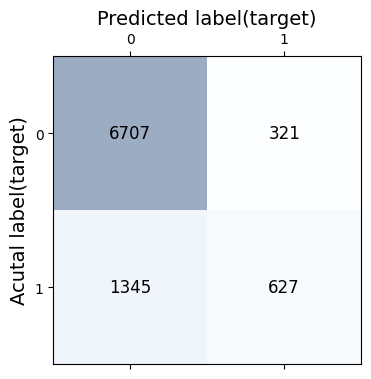

In [59]:
con_m = confusion_matrix(y_test, pred_value, normalize=None)  # normalize=c('true','pred','all'), None

fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(con_m, cmap=plt.cm.Blues, alpha=0.4)
for i in range(con_m.shape[0]):
    for j in range(con_m.shape[1]):
        ax.text(x=j,y=i,s=np.round(con_m[i,j],3),va='center',ha='center', fontsize=12)
#plt.xlabel('predicted label(target)',fontsize=14)
plt.ylabel('Acutal label(target)', fontsize=14)
plt.title("Predicted label(target)",fontsize=14)
plt.show()

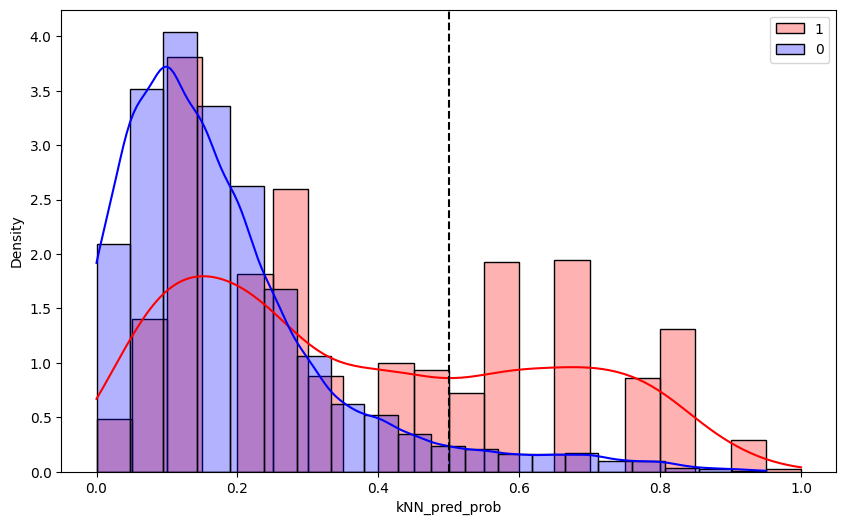

In [60]:
plt.figure(figsize=(10,6))
#plt.style.use('ggplot')

sns.histplot(data=result_clf.query('default_YN==1')['kNN_pred_prob'], stat='density', kde='True',bins=20, color='red', alpha=0.3, label='1')
sns.histplot(data=result_clf.query('default_YN==0')['kNN_pred_prob'], stat='density', kde='True',bins=20, color='blue', alpha=0.3, label='0')

plt.axvline(0.5, linestyle ='--', color='black')

plt.legend()
plt.show()

+ ROC 및 AUC

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score

In [52]:
# Baseline setting
ns_probs = [0 for _ in range(len(X_test))]
ns_fpr,ns_tpr,_= roc_curve(y_test, ns_probs)

In [53]:
mdl_fpr,mdl_tpr,threshold=roc_curve(y_test, pred_probability[:,1])

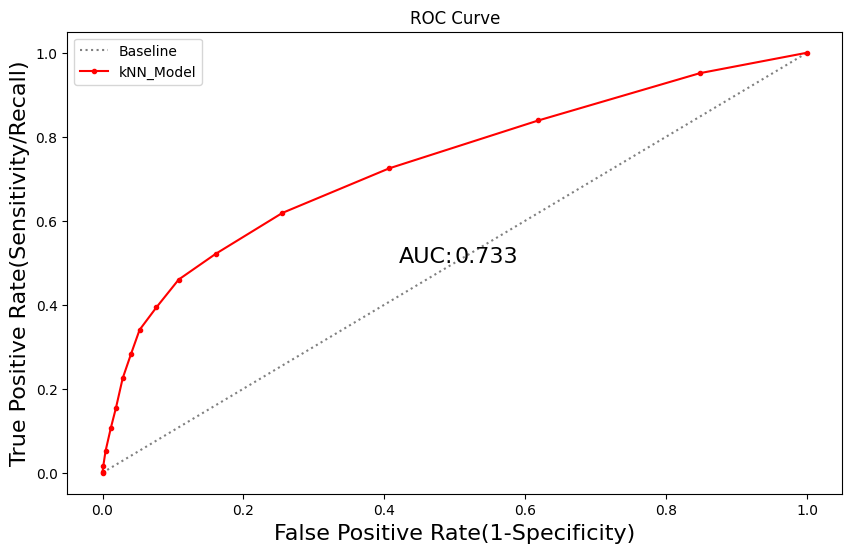

In [54]:
plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(ns_fpr, ns_tpr,linestyle=':',color='gray', label='Baseline')
plt.plot(mdl_fpr, mdl_tpr,marker='.', color='red',label='kNN_Model')

plt.text(0.5, 0.5, np.round(roc_auc_score(y_test, pred_probability[:,1]),3), fontsize=16)
plt.text(0.42, 0.5, "AUC:", fontsize=16)
plt.xlabel('False Positive Rate(1-Specificity)', fontsize=16)
plt.ylabel('True Positive Rate(Sensitivity/Recall)', fontsize=16)

plt.legend()
plt.show()

In [44]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("Recall   : ", recall_score(y_test, pred_value))
print("Precision: ", precision_score(y_test, pred_value))
print("F1-Score  :", f1_score(y_test, pred_value))

Recall   :  0.31795131845841784
Precision:  0.6613924050632911
F1-Score  : 0.42945205479452053
